In [1]:
import arviz as az
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.25, palette='tab10')

In [2]:
import os.path as op
from risk_experiment.cogmodels.fit_model import build_model, get_data
bids_folder = '/data/ds-risk'

/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
model_label = 'neural3'
session = '3t2'
bids_folder = '/data/ds-risk'
roi = 'npcr'

cm = 1/2.54  # centimeters in inches

In [4]:
data = get_data(model_label, session, bids_folder, roi)
model = build_model(model_label, data, roi)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', 'ses-3t2_model-neural3_trace.netcdf'))

100%|██████████| 30/30 [00:01<00:00, 16.52it/s]


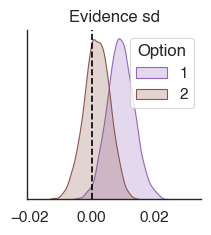

In [5]:
evidence_sd = pd.concat((idata.posterior['n1_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['n2_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'n1_evidence_sd_mu':1, 'n2_evidence_sd_mu':2})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=sns.color_palette()[4:], aspect=1.1, height=2.5)
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Evidence sd')
# fac.add_legend()
plt.legend(title='Option')

plt.axvline(0, c='k', ls='--')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_neural_evidence_sd.pdf'), bbox_inches='tight')

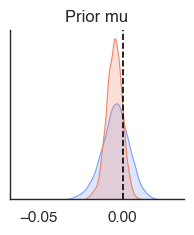

In [6]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_mu_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_mu_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_mu_mu':'Risky', 'safe_prior_mu_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=1.1, height=2.5, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Prior mu')

plt.axvline(0.0, c='k', ls='--')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_neural_prior_mu.pdf'), bbox_inches='tight')

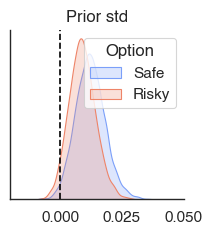

In [7]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_std_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_std_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=1.1, height=2.5, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Prior std')

plt.axvline(0.0, c='k', ls='--')

plt.legend(title='Option')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_neural3_prior_std.pdf'), bbox_inches='tight')

In [8]:
ppc = model.ppc(trace=idata.sel(draw=slice(None, None, 10)), data=data)

# "Chose risky" vs "chose 2nd option coding"
ppc.loc[ppc.index.get_level_values('risky_first')] = 1 - ppc.loc[ppc.index.get_level_values('risky_first')]


Plotting ppc type 11
           median_split(sd) log(risky/safe)  p_predicted    hdi025    hdi975  \
0   High neural uncertainty               1     0.252179  0.214684  0.289164   
1   High neural uncertainty               2     0.319742  0.278914  0.357020   
2   High neural uncertainty               3     0.423343  0.381513  0.463471   
3   High neural uncertainty               4     0.545969  0.504172  0.585542   
4   High neural uncertainty               5     0.614514  0.576455  0.653988   
5   High neural uncertainty               6     0.698561  0.657242  0.735589   
6    Low neural uncertainty               1     0.245538  0.210980  0.282270   
7    Low neural uncertainty               2     0.339212  0.300179  0.379155   
8    Low neural uncertainty               3     0.438577  0.394226  0.480418   
9    Low neural uncertainty               4     0.551757  0.511638  0.589088   
10   Low neural uncertainty               5     0.650727  0.614151  0.689221   
11   Low neural unc

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:66: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:241: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:72: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


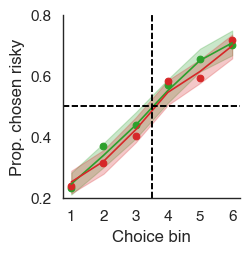

In [9]:
from risk_experiment.cogmodels.utils import plot_ppc
fac = plot_ppc(data, ppc, 11, level='group', legend=False)

fac.fig.set_size_inches(6.4*cm, 6.4*cm)
fac.set(xlabel='Choice bin', ylim=(.2, .8), xticks=[1,2,3,4,5,6])

plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_neural3_ppc11.pdf'), bbox_inches='tight')

Plotting ppc type 12
    risky_first         median_split(sd)  n_safe  p_predicted    hdi025  \
0         False  High neural uncertainty     5.0     0.508332  0.446977   
1         False  High neural uncertainty     7.0     0.530148  0.470574   
2         False  High neural uncertainty    10.0     0.526995  0.466310   
3         False  High neural uncertainty    14.0     0.526996  0.474077   
4         False  High neural uncertainty    20.0     0.526814  0.469434   
5         False  High neural uncertainty    28.0     0.502649  0.446307   
6         False   Low neural uncertainty     5.0     0.530781  0.475145   
7         False   Low neural uncertainty     7.0     0.523893  0.465988   
8         False   Low neural uncertainty    10.0     0.527544  0.475073   
9         False   Low neural uncertainty    14.0     0.511396  0.459634   
10        False   Low neural uncertainty    20.0     0.492256  0.441995   
11        False   Low neural uncertainty    28.0     0.509940  0.443690   
12  

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:66: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:241: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:72: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose

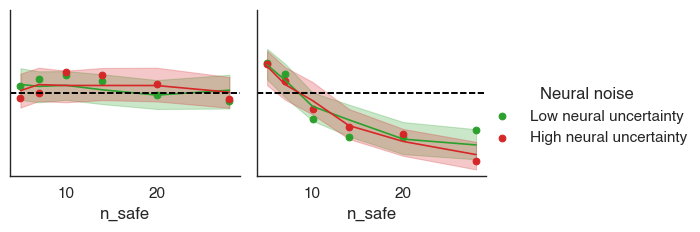

In [10]:
from risk_experiment.cogmodels.utils import plot_ppc
fac = plot_ppc(data, ppc, 12, level='group', legend=True)

fac.set(ylim=(.2, .8), ylabel=None, yticks=[])
fac.set_titles('')
fac.fig.set_size_inches(3.1*6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_neural3_ppc13.pdf'), bbox_inches='tight')
# plt.tight_layout()

# 7t2

In [11]:
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', 'ses-7t2_model-neural3_trace.netcdf'))

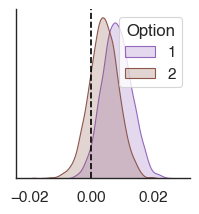

In [12]:
evidence_sd = pd.concat((idata.posterior['n1_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['n2_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'n1_evidence_sd_mu':1, 'n2_evidence_sd_mu':2})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=sns.color_palette()[4:], aspect=1.1, height=2.5)
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
# plt.title('Evidence sd')
# fac.add_legend()
plt.legend(title='Option')

plt.axvline(0, c='k', ls='--')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)

plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-7t2_neural_evidence_sd.pdf'), bbox_inches='tight')

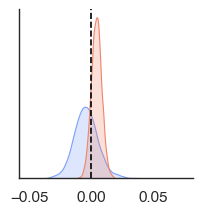

In [13]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_mu_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_mu_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_mu_mu':'Risky', 'safe_prior_mu_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=1.1, height=2.5, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
# plt.title('Prior mu')

plt.axvline(0.0, c='k', ls='--')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)

plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-7t2_neural_prior_mu.pdf'), bbox_inches='tight')

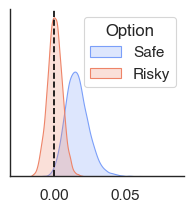

In [14]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_std_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_std_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=1.1, height=2.5, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
# plt.title('Prior std')

plt.axvline(0.0, c='k', ls='--')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)

plt.legend(title='Option')
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-7t2_neural3_prior_std.pdf'), bbox_inches='tight')

In [15]:
ppc = model.ppc(trace=idata.sel(draw=slice(None, None, 10)), data=data)

# "Chose risky" vs "chose 2nd option coding"
ppc.loc[ppc.index.get_level_values('risky_first')] = 1 - ppc.loc[ppc.index.get_level_values('risky_first')]


Plotting ppc type 11
           median_split(sd) log(risky/safe)  p_predicted    hdi025    hdi975  \
0   High neural uncertainty               1     0.269755  0.231063  0.302945   
1   High neural uncertainty               2     0.338255  0.301001  0.381484   
2   High neural uncertainty               3     0.418780  0.379160  0.465461   
3   High neural uncertainty               4     0.536063  0.498675  0.579695   
4   High neural uncertainty               5     0.595104  0.563360  0.638351   
5   High neural uncertainty               6     0.665849  0.620224  0.701564   
6    Low neural uncertainty               1     0.238627  0.205941  0.279049   
7    Low neural uncertainty               2     0.324423  0.287254  0.366106   
8    Low neural uncertainty               3     0.408308  0.368152  0.457089   
9    Low neural uncertainty               4     0.527267  0.488918  0.564185   
10   Low neural uncertainty               5     0.614487  0.581728  0.658898   
11   Low neural unc

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:66: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:241: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:72: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose_risky']]


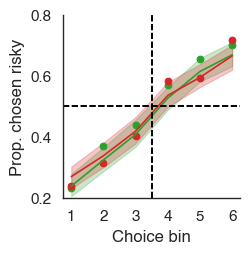

In [16]:
from risk_experiment.cogmodels.utils import plot_ppc
fac = plot_ppc(data, ppc, 11, level='group', legend=False)

fac.fig.set_size_inches(6.4*cm, 6.4*cm)
fac.set(xlabel='Choice bin', ylim=(.2, .8), xticks=[1,2,3,4,5,6])

plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-7t2_neural3_ppc11.pdf'), bbox_inches='tight')

Plotting ppc type 12
    risky_first         median_split(sd)  n_safe  p_predicted    hdi025  \
0         False  High neural uncertainty     5.0     0.496235  0.432369   
1         False  High neural uncertainty     7.0     0.511315  0.450862   
2         False  High neural uncertainty    10.0     0.502011  0.438751   
3         False  High neural uncertainty    14.0     0.492587  0.434717   
4         False  High neural uncertainty    20.0     0.480417  0.420899   
5         False  High neural uncertainty    28.0     0.461263  0.409519   
6         False   Low neural uncertainty     5.0     0.474022  0.416526   
7         False   Low neural uncertainty     7.0     0.474509  0.427302   
8         False   Low neural uncertainty    10.0     0.485187  0.435400   
9         False   Low neural uncertainty    14.0     0.480817  0.430529   
10        False   Low neural uncertainty    20.0     0.476731  0.426966   
11        False   Low neural uncertainty    28.0     0.486046  0.430860   
12  

/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:66: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:241: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/risk_experiment/risk_experiment/cogmodels/utils.py:72: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['chose

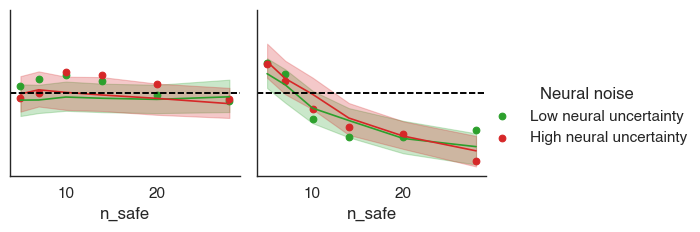

In [17]:
from risk_experiment.cogmodels.utils import plot_ppc
fac = plot_ppc(data, ppc, 12, level='group', legend=True)

fac.set(ylim=(.2, .8), ylabel=None, yticks=[])
fac.set_titles('')
fac.fig.set_size_inches(3.1*6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-7t2_neural3_ppc13.pdf'), bbox_inches='tight')
# plt.tight_layout()

# Both

In [19]:
model_label = 'neural33'
session = None
bids_folder = '/data/ds-risk'
roi = 'npcr'

cm = 1/2.54  # centimeters in inches

In [20]:
data = get_data(model_label, session, bids_folder, roi)
model = build_model(model_label, data, roi)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

100%|██████████| 30/30 [00:04<00:00,  7.10it/s]


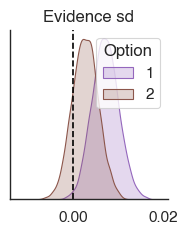

In [42]:
evidence_sd = pd.concat((idata.posterior['n1_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['n2_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'n1_evidence_sd_mu':1, 'n2_evidence_sd_mu':2})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=sns.color_palette()[4:], aspect=1.1, height=2.5)
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Evidence sd')
# fac.add_legend()
plt.legend(title='Option')

plt.axvline(0, c='k', ls='--')
# plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'neural_evidence_sd.pdf'), bbox_inches='tight')

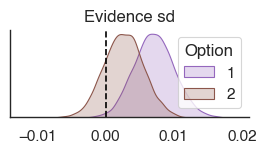

In [44]:
evidence_sd = pd.concat((idata.posterior['n1_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['n2_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'n1_evidence_sd_mu':1, 'n2_evidence_sd_mu':2})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=sns.color_palette()[4:], aspect=2., height=1.7)
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Evidence sd')
# fac.add_legend()
plt.legend(title='Option')

plt.axvline(0, c='k', ls='--')
# plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'neural_evidence_sd_lowheight.pdf'), bbox_inches='tight')

In [29]:
(evidence_sd.xs('n1_evidence_sd_mu', 0, -1)['value'] < 0.0).mean()

0.0085

In [30]:
(evidence_sd.xs('n2_evidence_sd_mu', 0, -1)['value'] < 0.0).mean()

0.18516666666666667

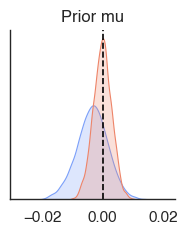

In [23]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_mu_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_mu_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_mu_mu':'Risky', 'safe_prior_mu_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=1.1, height=2.5, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Prior mu')

plt.axvline(0.0, c='k', ls='--')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'neural_prior_mu.pdf'), bbox_inches='tight')

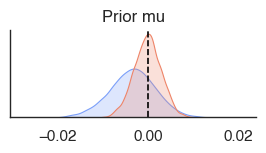

In [45]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_mu_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_mu_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_mu_mu':'Risky', 'safe_prior_mu_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=2., height=1.7, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Prior mu')

plt.axvline(0.0, c='k', ls='--')
# plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'neural_prior_mu_lowheight.pdf'), bbox_inches='tight')

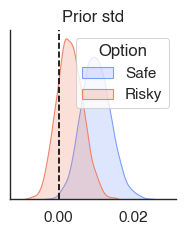

In [24]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_std_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_std_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=1.1, height=2.5, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Prior std')

plt.axvline(0.0, c='k', ls='--')

plt.legend(title='Option')
plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'neural3_prior_std.pdf'), bbox_inches='tight')

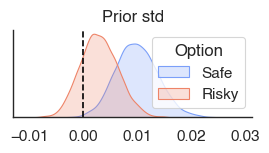

In [47]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_std_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_std_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=2.0, height=1.7, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Prior std')

plt.axvline(0.0, c='k', ls='--')

plt.legend(title='Option')
# plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'neural3_prior_std_lowheight.pdf'), bbox_inches='tight')

In [25]:
print((evidence_sd.xs('risky_prior_std_mu', 0, -1)['value'] < 0.0).mean())
print((evidence_sd.xs('safe_prior_std_mu', 0, -1)['value'] < 0.0).mean())

0.20533333333333334
0.004833333333333334


# Both (risky first-effect)

In [4]:
model_label = 'neural55'
session = None
bids_folder = '/data/ds-risk'
roi = 'npcr'

cm = 1/2.54  # centimeters in inches

In [5]:
data = get_data(model_label, session, bids_folder, roi)
model = build_model(model_label, data, roi)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

100%|██████████| 30/30 [00:01<00:00, 17.43it/s]


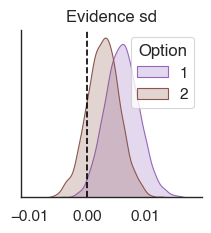

In [6]:
evidence_sd = pd.concat((idata.posterior['n1_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['n2_evidence_sd_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'n1_evidence_sd_mu':1, 'n2_evidence_sd_mu':2})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=sns.color_palette()[4:], aspect=1.1, height=2.5)
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Evidence sd')
# fac.add_legend()
plt.legend(title='Option')

plt.axvline(0, c='k', ls='--')
# plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'neural_evidence_sd_v2.pdf'), bbox_inches='tight')

In [7]:
(evidence_sd.xs('n1_evidence_sd_mu', 0, -1)['value'] < 0.0).mean()

0.017833333333333333

In [9]:
idata.posterior['n1_evidence_sd_mu'].to_dataframe()

n1_evidence_sd_mu
chain draw n1_evidence_sd_regressors                            
0     0    Intercept                                   -1.069651
           risky_first[T.True]                         -0.245024
           session[T.7t2]                               0.211570
           risky_first[T.True]:session[T.7t2]          -0.014537
           sd                                           0.008921
...                                                          ...
3     1499 Intercept                                   -1.041613
           risky_first[T.True]                         -0.220126
           session[T.7t2]                              -0.020061
           risky_first[T.True]:session[T.7t2]           0.399939
           sd                                           0.010341

[30000 rows x 1 columns]

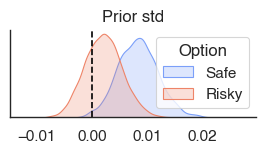

In [12]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

evidence_sd = pd.concat((idata.posterior['risky_prior_std_mu'].to_dataframe().xs('sd', 0, -1), (idata.posterior['safe_prior_std_mu'].to_dataframe().xs('sd', 0, -1))), axis=1)
evidence_sd.columns.name = 'parameter'
evidence_sd = evidence_sd.stack().to_frame('value')
evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})

fac = sns.FacetGrid(evidence_sd.reset_index(), hue='Option', palette=palette, aspect=2.0, height=1.7, hue_order=['Safe', 'Risky'])
fac.map(sns.kdeplot, 'value', fill=True)
fac.set(xlabel=None, ylabel=None, yticks=[])
plt.title('Prior std')

plt.axvline(0.0, c='k', ls='--')

plt.legend(title='Option')
# plt.gcf().set_size_inches(6.4*cm, 6.4*cm)
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'neaural_prior_std_v2.pdf'), bbox_inches='tight')